# TSA Notebook

MMMMM from 231129 ipynb from Alireza: move these to the right page, or keep all here? If on other page, put under a second-level heading, as above

With this notebook, you can practice the lectures/videos material. First, you need to study the lecture slides and/or watch the pre-recorded videos. Having studied the lecture material, you are ready to implement your knowledge and practice by doing this notebook.
Enjoy Time Series Analysis!

In [1]:
# Import the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install statsmodels
#from statsmodels.tsa.stattools import adfuller
import scipy.signal
from statsmodels.graphics.tsaplots import plot_acf
from scipy import signal

### Exercise 1. Components of time series  (Video 1) 

**Introduction:** The four components of time series are the trend, seasonality, offset, and noise (white/colored). We use simulated data to show these components here. The observation equation of time series should have the following mathematical representation:
$$Y(t) = y_0 + r t + a \cos(\omega_ot) + b\sin(\omega_ot) + o {u_k(t)} + \epsilon(t)= y_0 + r t + A_m \sin(\omega_o t+\phi_0) + o {u_k(t)} + \epsilon(t)$$
where
- $y_0 $: intercept (e.g. in mm)
- $r$: is the rate (e.g. in mm/day)
- $a$ and $b$ are the coefficients of the periodic signal 
- $\omega$ is the frequency of signal (e.g. cycle/ day)
- $o$ is the size of the offset at time instant $t_k$
- $\epsilon(t)$ is the random noise with a given variance which follows a Normal distribution: $ \epsilon(t) \sim \textbf{N}(0, \sigma^2)$

Here, we are assuming only a single seasonality and offset component. However, in many practical scenarios, there could be multiple components related to these.

**Exercise:**
You can simulate your time series based on the priori information provided in the scripts. Plot your results and change the input variables to see the effect.

*The noise follows a normal distribution: use np.random.normal in order to draw random samples from a normal (Gaussian) distribution. Study more for this function here: [normal distribution in python](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)*

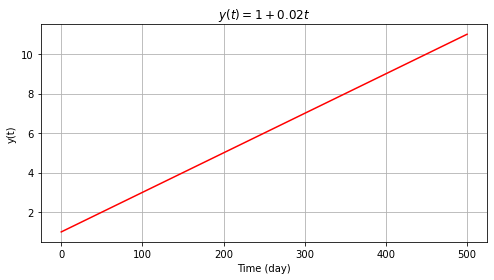

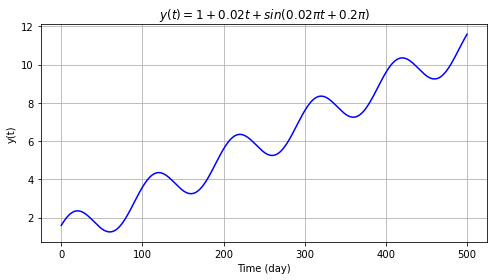

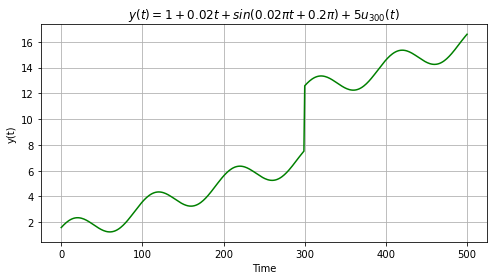

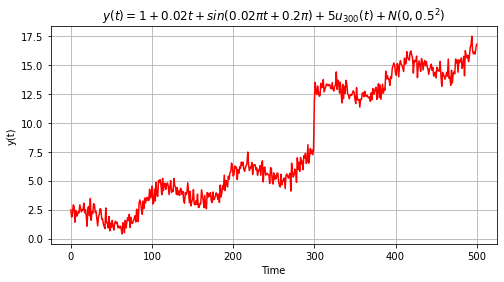

In [2]:
np.random.seed(0)  # For reproducibility

# create your code here:
# create an array with 501 timesteps (in terms of day, so day 0, day 1,...,day 500)
time = np.arange(501) 
# m is the length of tim\epsilon_steps (so number of time series observations)
m = len(time)
# give an intercept of 1 mm
y_0 = 1 
# provide a particular rate of 0.02 mm/day
r = 0.02 
# make the time series observations (so far without noise) based on the above two components:
y1 = y_0 + r*time 

# plot y1 versus time:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y1, color='red')
plt.ylabel('$Y$(t)')
plt.xlabel('Time (day)')
plt.title('$$Y$(t) = 1 + 0.02 t $')

# introduce (add) a seasonality to the generated data
# A sine signal Am*sin(omega * time + phi_0) can be added
# omega=2*pi*f can be obtained from f = 0.01 cycle/day (1 cycle per 100 days)
omega = 2 * np.pi/100 
# the amplitude of signal is assumed to be 1 mm 
Am = 1 
# the initial phase is assumed to be 0.2π (radian) 
phi_0 = 0.2*np.pi # initial phase
# add the sesonality to y1 to make y2
y2 = y1 + Am*np.sin(omega * time + phi_0) 

# plot y2 versus time:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y2, color='blue')
plt.ylabel('$Y$(t)')
plt.xlabel('Time (day)')
plt.title('$$Y$(t) = 1 + 0.02 t + sin(0.02πt + 0.2π) $')

# add an offset to y2 at epoch (time instance) 300
t_k = 300 
# offset size of your choice (for example 5 mm) - the jump in your data!
O_k = 5 
y3 = y2.copy() 
y3[t_k:] = y3[t_k:] + O_k
# plot y3 versus time to see the effect of the offset:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y3, color='g')
plt.ylabel('$Y$(t)')
plt.xlabel('Time')
plt.title('$$Y$(t) = 1 + 0.02 t + sin(0.02πt + 0.2π) + 5 u_{300}(t)$')

# add randon error (white noise) which follows a normal distribution 
# (mean of zero mm, and standard deviations of 0.5 mm)
# change these parameters to see the effect
mean = 0 
sigma = 0.5 
et = np.random.normal(loc = mean, scale = sigma, size = m) 
y4 = y3 + et 

# plotting:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y4, color='red')
plt.ylabel('$Y$(t)')
plt.xlabel('Time')
plt.title('$$Y$(t) = 1 + 0.02 t + sin(0.02πt + 0.2π) + 5 u_{300}(t) + N(0,0.5^2)$')

### Exercise 2. Stationary time series (Video 2)
**Introduction:** In the previous exercise, we created and plotted the $Y_4$ time series, now we check its stationarity. Remember that we need to ensure *stationarity* of the time series data-set for *forecasting and predictive models*. 
In this excercise, you can test the stationarity of the time series using transformation and visual inspection and the Augmented Dickey-Fuller (ADF) test (The ADF test is optional). 

**Background knowledge:** The ADF test can be performed by using two hypotheses (Null Hypothesis and Alternative Hypothesis):

1. Null Hypothesis $H_o$: we assume that the time series is not stationary. 
2. Althernative Hypothesis $H_a$: we assume that the time series is stationary. 

If the test statistic is smaller than the critical value, the null hypothesis is rejected and therefore the time series is stationary. In this case the the p-value becomes very small. In python, there is a package: **statsmodels** which has the function of **adfuller method**. We use the adfuller() function to test the stationarity of the data-set. Regarding the interpretation of the adfuller function, the first output is the test-statistic, the second one is the p-value, etc.

**Excercise:** We take the time series and the noise from the Excercise 1 $Y_2$, $Y_4$ and $\epsilon_t$. We also use the single differencing method to make the time series stationary and plot the results. Later we will also use the least squares method (best linear unbiased estimation - BLUE) to de-trend the data. 

In [3]:
from statsmodels.tsa.stattools import adfuller # optional

Test statistics:-15.24, pvalue:0.0000, Critical_value(1%):-3.44


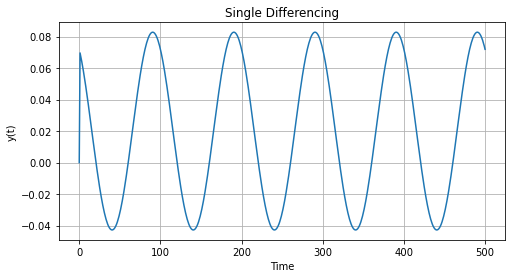

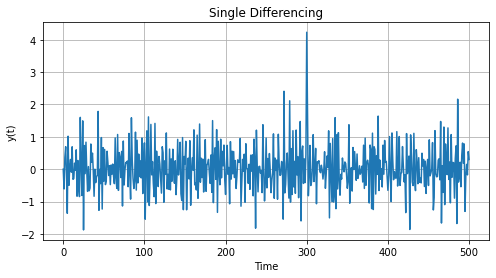

In [4]:
# we apply single differencing to y2 and y4 to see if they become stationary.
diff_y2 = np.diff(y2)
# insert the first entry/element as zero
diff_y2 = np.insert(diff_y2, 0, 0)
# plotting:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, diff_y2)
plt.ylabel('$Y$(t)')
plt.xlabel('Time')
plt.title('Single Differencing')
# it looks non-stationary. It looks like a cos function, can you explain this?
# how to make y4 stationay? (different methods exist, we now use single differencing, later the BLUE fit)
# single differencing
diff_y4 = np.diff(y4)
diff_y4 = np.insert(diff_y4, 0, 0)
# plotting:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, diff_y4)
plt.ylabel('$Y$(t)')
plt.xlabel('Time')
plt.title('Single Differencing')
# it looks stationary, but we show it using ADF test

# OPTIONAL
# Stationary test using ADF test (this is optional)
# show that the single differencing gave stationary dataset:
test_diff_y4 = adfuller(diff_y4)
test_statistic = test_diff_y4[0]
p_value = test_diff_y4[1]
critical_value = test_diff_y4[4]
print(f'Test statistics:{test_statistic:.2f}, pvalue:{p_value:.4f}, Critical_value(1%):{critical_value["1%"]:.2f}')
# Test statistic < Critical value and p_value is small so Null hypothesis is rejected => Time series is Stationary


### Exercise 3.  Autocovariance function and PSD (Video 3)
**Introduction:** In this exercise, you will focus on normalized auto-covariance function (ACF) and the power spectral density (PSD), and the auto-regressive moving average (ARMA).

**Background knowledge:** In python there are functions for ACF and PSD. These functions are given from statsmodels.graphics.tsaplots (plot_acf). These functions create automatically a plot. Regarding the PSD, there is a function from the package of scipy (signal) and you need to use the signal.periodogram to calculate the PSD. These libraries are already imported in this notebook. Alternative way to compute the PSD is based on the least-squares harmonic estimation (LS-HE), which is based on hypothesis testing (see optional materials on relation between FFT PSD and LS-HE PSD).

**Exercise:** We use the above functions to plot the ACF and PSD of white noise time series. Later we also compute them for the ARMA(p,q) process. We generate a white noise process, similar to that created in exercise 1 ($m=501$). We will see that white noise does not show any temporal correlation. 

Text(0.5, 0, 'Frequency')

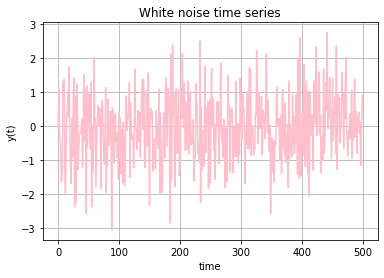

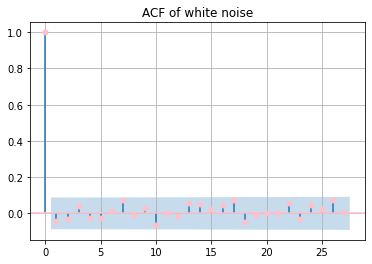

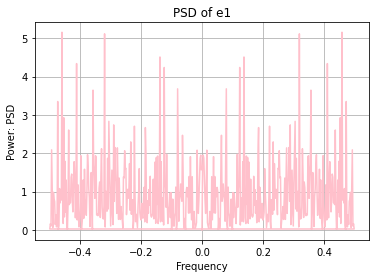

In [5]:
# ACF + PSD of a white noise process
mean1 = 0 
sigma1 = 1
m = 501
time = np.arange(m) 
Fs = 1 # sampling rate

# simulate a normal white noise process with the given mean and standard deviation
e1 = np.random.normal(loc = mean1, scale = sigma1, size = m) 
yt1 = e1

# plot the time series
plt.figure()
plt.grid()
plt.plot(time, yt1, color='pink')
plt.title('White noise time series')
plt.ylabel('$Y$(t)')
plt.xlabel('time')

# plot the normalized auto-covariance function (ACF) of the generated noise.
# explain the plot of ACF (do you see temoral correlation in this time series?)
ACF = plot_acf(yt1, lags=None, alpha=0.05, title='ACF of white noise', color='pink')
plt.grid()

# plot the white noise PSD
F, PSD = signal.periodogram(yt1, fs=Fs, scaling='density', return_onesided=False)
# F, PSD = signal.periodogram(yt, fs=Fs, scaling='density')
plt.figure()
plt.grid()
plt.plot(F, PSD, color='pink')
plt.title('PSD of e1')
plt.ylabel('Power: PSD')
plt.xlabel('Frequency')
# The PSD values seem to be the same at all frequencies (no frequency dependent).so it looks flat indicating that all 
# frequencies have identical contributions to construct data (variations).  
# Think of the white LIGHT that has similar characteristics.

### Exercise 4.  ARMA: MA(1), ACF + PSD (Video 4)
**Introduction:** In this exercise, you will focus on special case of ARMA(p,q) process, namely ARMA(0,1)=MA(1) process. You then you compare the ACF and PSD of the genearted time series.

**Exercise:** You are asked to generate a MA(1) time series. As you know from the lectures/videos an MA(1) is of the form

$$
Y_t = \theta \epsilon_{t-1}+ \epsilon_{t}
$$

You may assume $\theta=0.8$, and the time series is assumed to be stationary, so $\mathbb{E}(Y_t)=0$ and $\mathbb{D}(Y_t)=\sigma^2$, with $\sigma=1$. For generating the time series, you need an initialization of one sample generated randomly as $(0,\sigma^2)$, and then use the above recursive formulae. The variance of $\epsilon_t$ is obtained from

$$
\sigma_{\epsilon}^2 = \frac{\sigma^2}{1+\theta^2}
$$

You can then apply the ACF and PSD to the generated MA(1) noise process.

Text(0.5, 0, 'Frequency')

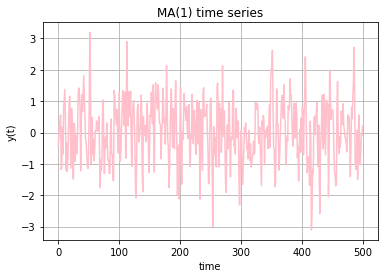

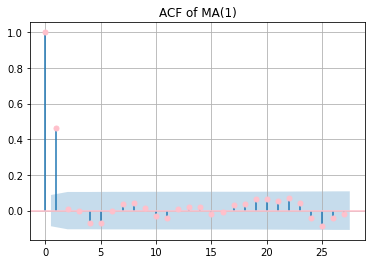

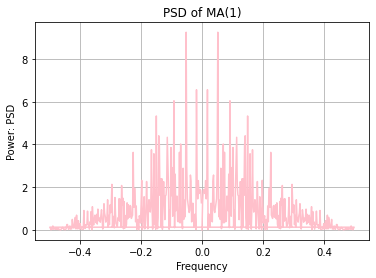

In [6]:
# simulate an ARMA(0,1)=MA(1) noise process (moving average of order 1)
mean2 = 0 
sigma2 = 1
theta = 0.7
m = 501
Fs = 1 # sampling rate

sigma_e = np.sqrt(sigma2**2/(1+theta**2))
yt2 = np.zeros(m) # make an array with zeros
et = np.zeros(m) # make an array with zeros
# initialization of the first entry
et[0] = np.random.randn() * sigma2
yt2[0] = et[0]
# generate values of yt using the MA(1)
for i in range(1, m):
    et[i] = np.random.randn() * sigma_e
    yt2[i] = theta * et[i-1] + et[i]

# plot the time series
plt.figure()
plt.grid()
plt.plot(time, yt2, color='pink')
plt.title('MA(1) time series')
plt.ylabel('$Y$(t)')
plt.xlabel('time')

# plot ACF MA(1) process
ACF = plot_acf(yt2, lags=None, alpha=0.05, title='ACF of MA(1)', color='pink')
plt.grid()

# plot the MA(1) PSD
F, PSD = signal.periodogram(yt2, fs=Fs, scaling='density', return_onesided=False)
plt.figure()
plt.grid()
plt.plot(F, PSD, color='pink')
plt.title('PSD of MA(1)')
plt.ylabel('Power: PSD')
plt.xlabel('Frequency')
# The PSD values seem to have larger values at lower frequencies. this indicates that lower frequencies 
# have higher contribution to data variability (moving avergare reduces the high frequency noise) 

### Exercise 5. Time series modelling (Video 5)
**Introduction:** In this exercise, you will focus on the Best Linear Unbiased Estimation (BLUE). With BLUE, if the components of the time series are known, you can use the linear model of observations to estimate these components. 

**Exercise:** In this excercise, you calculate the BLUE estimates. First, create your matrix $A$ and $\Sigma_{Y}$ which need to have dimensions of 501x5 (501: rows and 5 columns) and 501x501 respectively. Can you explain what these 5 parameters are? For $\Sigma_{Y}$, you can use the np.eye function from numpy. Having defined these two matrices, we can obtain the BLUE estimats of 

$$
\hat{X}=(A^T \Sigma_{Y}^{-1}A)^{-1}A^T \Sigma_{Y}^{-1}Y,\, \, \hat{Y}=...,\, \, \hat{\epsilon}=...
$$ 

along with their covariance matrices $\Sigma_{\hat{X}}=(A^T \Sigma_{Y}^{-1}A)^{-1}$, $\Sigma_{\hat{Y}}=...$ and $\Sigma_{\hat{\epsilon}}=...$. 

After you have estimated the $\hat{X}$ (having 5 elements), we you can compare each element of the $\hat{x}$ with the corresponding values from the original time series you simulated ($y_0$, $r$, $A_m$, $\phi$, $o_k$). The precision of the parameters can also be obtained from $\Sigma_{\hat{X}}$. You may also want to follow hypothesis tests to test the statistical significance of the estimated parameters. 

y0: True value is: 1 ,  Estimated value is: 1.1104794855280757
r: True value is: 0.02 ,  Estimated value is: 0.019749730013193766
Am: True value is: 1 ,  Estimated value is: 0.8989701446874958
phi0: True value is: 0.6283185307179586 ,  Estimated value is: 0.5656440688725001
Ok: True value is: 5 ,  Estimated value is: 4.972202425807366


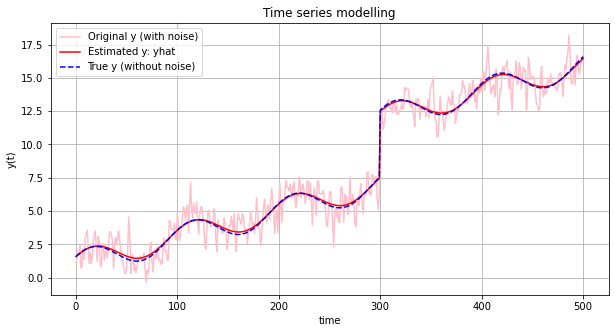

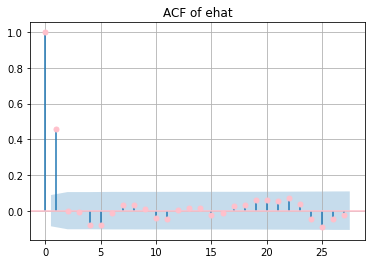

In [9]:
# create your code here:
# copied from Exercise 1
m = 501
time = np.arange(501) 
y_0 = 1 
r = 0.02 
omega = 2 * np.pi/100 
Am = 1 
phi_0 = 0.2*np.pi 
t_k = 300 
sigma = 1

# for your observations you can make use of y4 (in Exercise 1)
y = y4
# or make a new observation vector based on y3 (signal in Exercise 1) and yt (correlated noise in Exercise 4)
y = y3+yt2

# the design matrix A based on linear regression + seasonality:
A = np.stack((np.ones(m), time, np.cos(omega*time), np.sin(omega*time)), axis=1)
# include column due to offset into A
u = np.zeros(m)
u[t_k:] = 1
A = np.column_stack((A,u))
# make the covariance matrix
Qyy = (sigma**2) * np.eye(m) 

# implement BLUE Equations:
xhat = np.linalg.inv(A.T @ np.linalg.inv(Qyy) @ A) @ A.T @ np.linalg.inv(Qyy) @ y #BLUE: BLUE of x: xhat
yhat = A @ xhat #BLUE of $Y$: yhat
ehat = y - yhat #BLUE of e: ehat
# covariance matrix of xhat
Qxhat = np.linalg.inv(A.T @ np.linalg.inv(Qyy) @ A)

# Comparisons of xhat with the initial (true) values x:
y_0_hat = xhat[0] # compare with y_0
print('y0: True value is:', y_0,',  Estimated value is:', y_0_hat)
r_hat = xhat[1]   # compare with r
print('r: True value is:', r,',  Estimated value is:', r_hat)

Am_hat = np.sqrt(xhat[2]**2 + xhat[3]**2) # compare with Am
print('Am: True value is:', Am,',  Estimated value is:', Am_hat)

phi_0_hat = np.arctan(xhat[2]/xhat[3]) # compare with phi_0
print('phi0: True value is:', phi_0,',  Estimated value is:', phi_0_hat)

O_k_hat = xhat[4]  # compare with O_k
print('Ok: True value is:', O_k,',  Estimated value is:', O_k_hat)

plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(time, y, label='Original $Y$ (with noise)', color='pink')
plt.plot(time, yhat, label='Estimated $Y$: yhat', color='r')
plt.plot(time, y3, label='True $Y$ (without noise)', linestyle='--', color='b')
plt.title('Time series modelling')
plt.ylabel('$Y$(t)')
plt.xlabel('time')
plt.legend()

# we now check the residuals to identify the noise structure of ehat. Is it similar to the generated noise? 
ACF = plot_acf(ehat, lags=None, alpha=0.05, title='ACF of ehat', color='pink')
plt.grid()
# try to make a new observation vector based on y3 (Exercise 1) and yt (Exercise 4): $Y$ = y3+yt2, and compare the results.


### Exercise 6. Time series forecasting (Video 6) - optional

So far, the $Y$ values are provided for time instants from $t=0$ ($Y(0)$) to $t=500$ ($Y(500)$). The current question pertains to predicting values for $Y$ in the subsequent epochs, such as $Y_p[501]=$? In order to answer this question, we should note that similar to $Y$, $Y_p$ also consists of two components: deterministic (functional) part and stochastic part. For example, for epoch 501, you can make a new design matrix (for now only one row) to calculate the functional component: 

$$
A_p= [1, 501, \cos(501\omega), \sin(501\omega), 1]
$$

and 

$$
Y_{p_F} = A_p \hat{X}
$$

You need to calculate its stochastic component $Y_{p_S}$. That component depends on the noise process. If the noise process is white noise, there is no contribution from that component. If the noise is MA(1) the stochastic part of the prediction can be obtained from

$$
Y_{p_S}=Y_{501} = \theta \epsilon_{500}+\epsilon_{501}
$$

where the error $\epsilon_{501}$ in epoch 501 is not known, so the best prediction for that would be $\epsilon_{501}=0$. The error $\epsilon_{500}$ can be determined from the time series data $\hat{e}$, and therefore $Y_{501} = \theta \epsilon_{500}$. This is not further the subject of discussion/elaboration in this week. In the project, we will provide a Python function to handle/estimate the AR(p) parameters. 

Predicted value for epoch 501 is: [16.76202718]


C:\Users\AAMIRI~1\AppData\Local\Temp/ipykernel_27972/3448084877.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.array([500,501]), np.array([y[500], yp]), label='Estimated y: yhat', color='r')


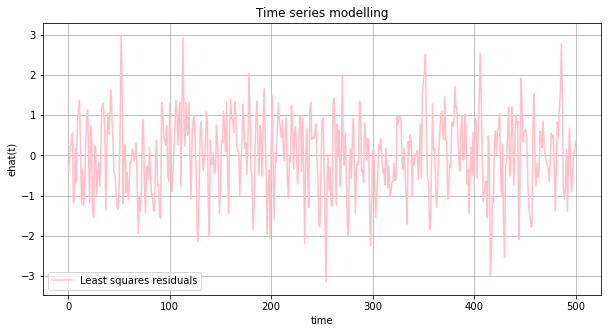

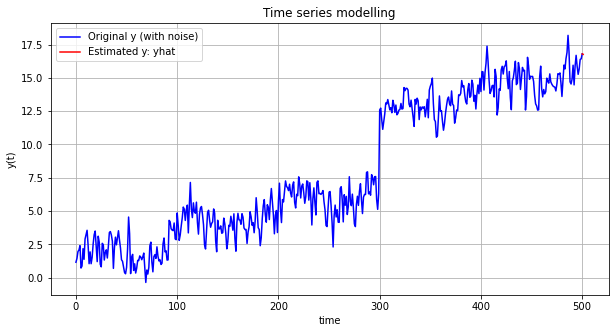

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

Ap  = np.array([1, 501, np.cos(omega*501), np.sin(omega*501), 1])
yp1 = Ap@xhat 

plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(time, ehat, label='Least squares residuals', color='pink')
plt.title('Time series modelling')
plt.ylabel('ehat(t)')
plt.xlabel('time')
plt.legend()

# if you select $Y$ = y3+yt2, containing MA(1)
model = ARIMA(ehat, order=(0, 0, 1))
result = model.fit()
# Forecast future values
forecast_steps = 1
yp2 = result.forecast(steps=forecast_steps)
yp = yp1+yp2

print('Predicted value for epoch 501 is:', yp)

plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(time, yp, label='Original $Y$ (with noise)', color='b')
#plt.plot([500,501], [$Y$(500), yp], label='Estimated $Y$: yhat', color='r')
plt.plot(np.array([500,501]), np.array([yp[500], yp]), label='Estimated $Y$: yhat', color='r')
plt.title('Time series modelling')
plt.ylabel('$Y$(t)')
plt.xlabel('time')
plt.legend()
